In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cityblock

from apollon.som.som import IncrementalMap
from apollon.som.utilities import umatrix, best_match

## Prepare features

In [2]:
la = pd.read_csv('../feat_matrix/london_after_binl_take1.csv', index_col=0)
lb = pd.read_csv('../feat_matrix/london_before_binl_take1.csv', index_col=0)

In [3]:
features = la.columns
target = [('a', i+1) for i in la.index.to_list()] + [('b', i+1) for i in lb.index.to_list()]

In [4]:
train_X = np.concatenate((la.to_numpy(), lb.to_numpy()))

## Fit SOM

In [52]:
dx = int(np.sqrt(train_X.shape[0]))+10
dw = train_X.shape[1]
som = IncrementalMap((dx, dx, dw), n_iter=100, eta=0.05, nhr=25)

In [53]:
som.fit(train_X)

## Results

In [54]:
um = umatrix(som.weights, som.shape, som.metric)
bmu, err = best_match(som.weights, train_X, som.metric)
px, py = np.unravel_index(bmu, som.shape)

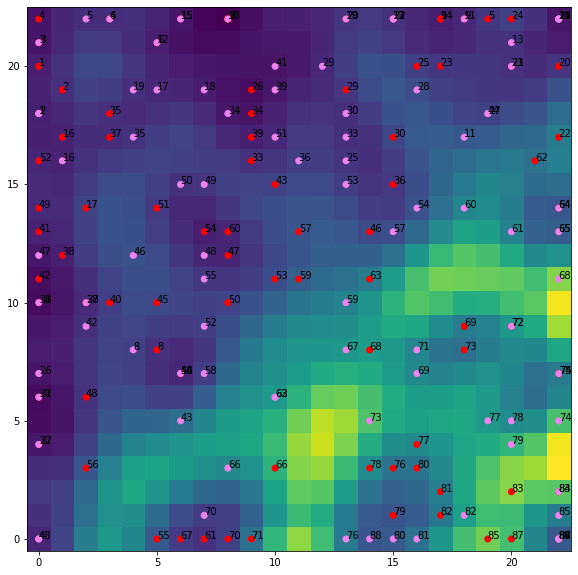

In [55]:
color_map = {'a': 'red', 'b': 'violet'}

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(um, aspect='equal', origin='lower')

ax.scatter(py, px, c=[color_map[t[0]] for t in target])

for t, (y, x) in zip(target, zip(px, py)):
    ax.text(x, y, t[1])

## Component planes

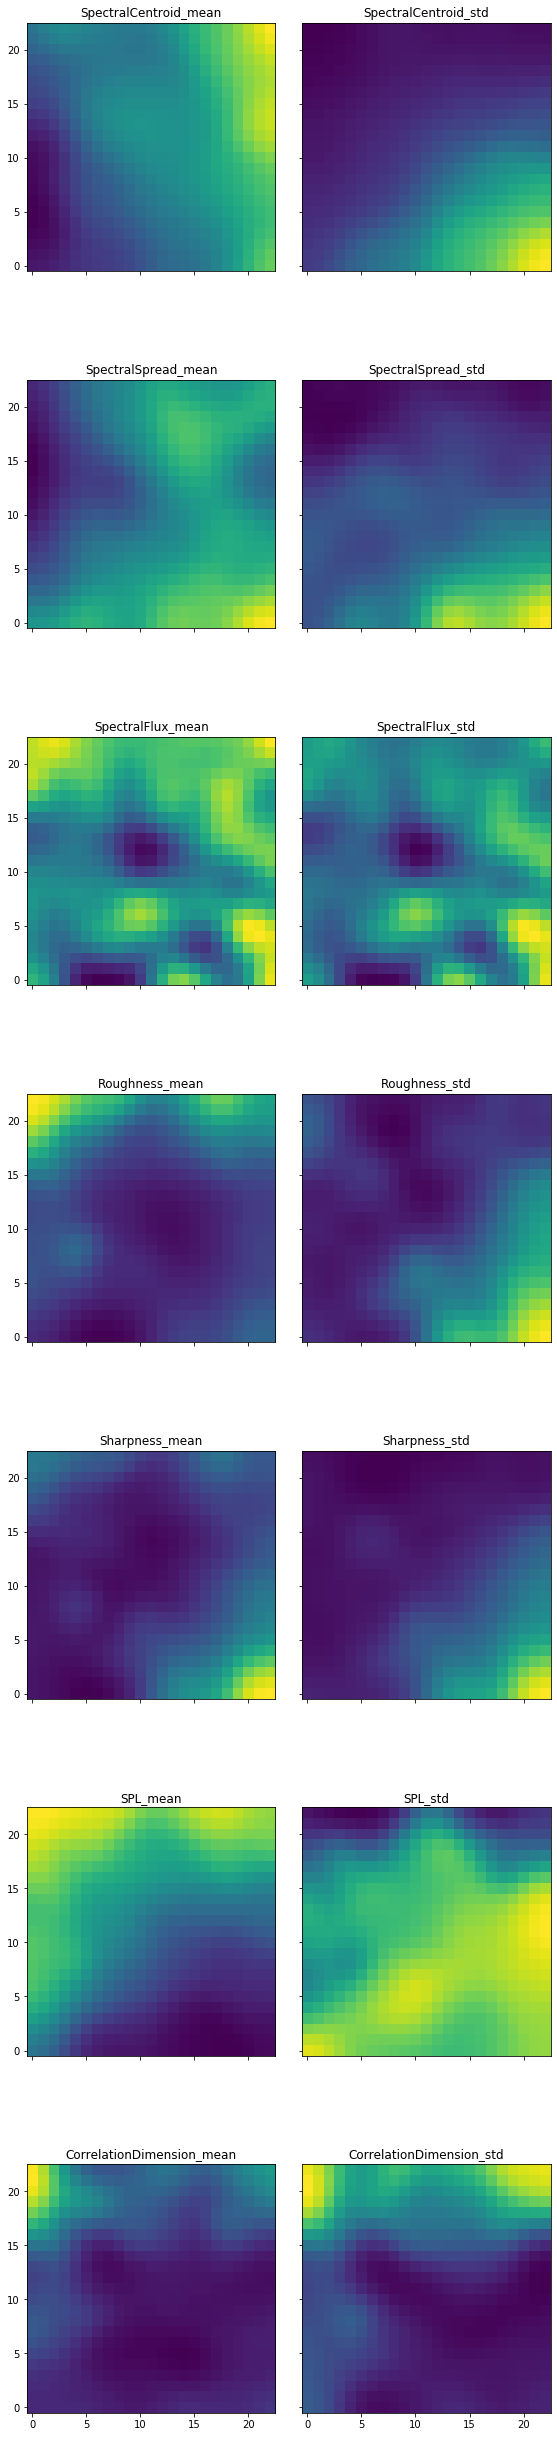

In [159]:
fig, (axs) = plt.subplots(7, 2, figsize=(8, 35), sharex=True, sharey=True)
fig.tight_layout()
for i, (fn, ax) in enumerate(zip(features, axs.flatten())):
    ax.set_title(fn)
    ax.imshow(som.weights[:, i].reshape(som.shape), origin='lower', aspect='equal')

In [133]:
## Magnitude of weights

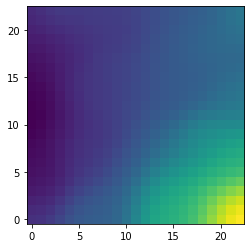

In [134]:
wnorm = np.linalg.norm(som.weights, axis=1)
plt.imshow(wnorm.reshape(som.shape), origin='lower')

## Map distance of unison keys per condition

Plot the map distance between unison keys of each condition agains the key number. Dahsed lines mark pitch class 'C'.

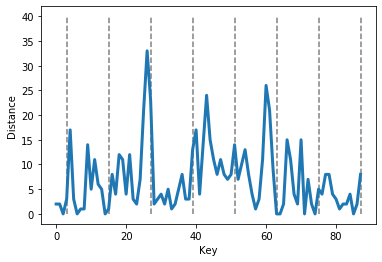

In [112]:
midx = np.dstack((px, py)).squeeze()
d = [cityblock(midx[i], midx[i+88]) for i in range(88)]

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Key');
ax.set_ylabel('Distance');
ax.vlines(np.arange(3, 88, 12), 0, 40, linestyles='dashed', alpha=.5, zorder=-10)
ax.plot(d, lw=3)